No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        NS1       NS2         N         P         M         G         F  \
0  0.302589  0.124373  0.041555  0.170544  0.056295  0.908734  0.153147   
1  0.136226  0.103948  0.038439  0.096828  0.076066  0.568230  0.097113   
2  0.162182  0.068218  0.010108  0.039919  0.003669  0.323889  0.064442   
3  0.409315  0.340094  0.223103  0.417961  0.325570  0.907624  0.421887   
4  0.209563  0.310923  0.215853  0.243984  0.291194  0.593608  0.292905   
5  0.108039  0.113262  0.043810  0.045689  0.060010  0.223544  0.083173   

          L  
0  0.140754  
1  0.081735  
2  0.043939  
3  0.388480  
4  0.240950  
5  0.064563  


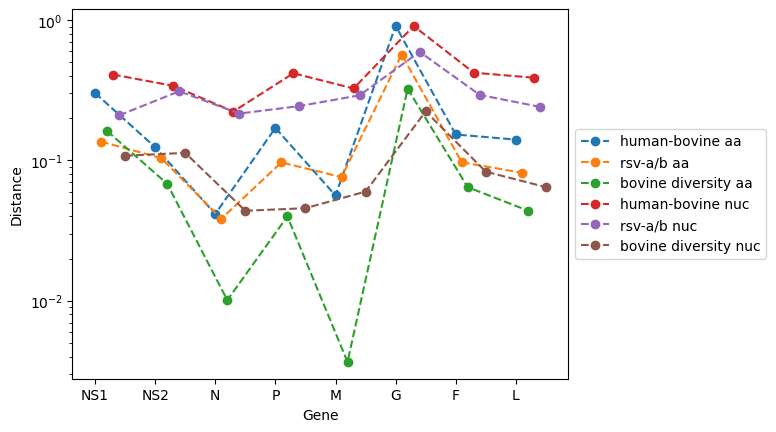

In [4]:
from Bio import Phylo
#from matplotlib.lines import _LineStyle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

listofgenes = ['NS1', 'NS2', 'N','P', 'M', 'G', 'F', 'L' ]

files_aa = [f'/home/laura/code/orthopneumovirus_comparison/results/alignedfiles/{gene}_alignedaa.fasta.treefile' for gene in listofgenes]
files_nuc = [f'/home/laura/code/orthopneumovirus_comparison/results/alignedfiles/{gene}_alignednuc.fasta.treefile' for gene in listofgenes]

dictionary_aa = dict()
dictionaryhrsv_aa = dict()
dictionarybrsv_aa = dict()
distances_aa = []
distances_hrsv_aa = []
distances_brsv_aa = []
dictionary_nuc = dict()
dictionaryhrsv_nuc = dict()
dictionarybrsv_nuc = dict()
distances_nuc = []
distances_hrsv_nuc = []
distances_brsv_nuc = []

for i in files_aa:

    T = Phylo.read(i, 'newick')
    T.root.clades
    T.root_at_midpoint()
    T.ladderize
    hrsv_anc = T.common_ancestor('MT107528.1', 'KJ627301.1', 'ON152648.1')
    brsv_anc = T.common_ancestor('MG947594.1', 'MT861050.1', 'OM328114.1', 'AF092942.1')
    distances_aa.append(T.distance(hrsv_anc, brsv_anc))

    rsvA_anc = hrsv_anc.common_ancestor('KJ627301.1', 'ON152648.1')
    rsvB_anc = hrsv_anc.common_ancestor('MT107528.1','MG431251.1')
    distances_hrsv_aa.append(hrsv_anc.distance(rsvA_anc, rsvB_anc))
    distances_brsv_aa.append(brsv_anc.total_branch_length() - brsv_anc.branch_length)

for i in files_nuc:

    T = Phylo.read(i, 'newick')
    T.root.clades
    T.root_at_midpoint()
    T.ladderize
    hrsv_anc = T.common_ancestor('MT107528.1', 'KJ627301.1', 'ON152648.1')
    brsv_anc = T.common_ancestor('MG947594.1', 'MT861050.1', 'OM328114.1', 'AF092942.1')
    distances_nuc.append(T.distance(hrsv_anc, brsv_anc))

    rsvA_anc = hrsv_anc.common_ancestor('KJ627301.1', 'ON152648.1')
    rsvB_anc = hrsv_anc.common_ancestor('MT107528.1','MG431251.1')
    distances_hrsv_nuc.append(hrsv_anc.distance(rsvA_anc, rsvB_anc))
    distances_brsv_nuc.append(brsv_anc.total_branch_length() - brsv_anc.branch_length)

for i, j in zip(listofgenes, distances_aa): dictionary_aa[i] = j
for i, j in zip(listofgenes, distances_hrsv_aa): dictionaryhrsv_aa[i] = j
for i, j in zip(listofgenes, distances_brsv_aa): dictionarybrsv_aa[i] = j
for i, j in zip(listofgenes, distances_nuc): dictionary_nuc[i] = j
for i, j in zip(listofgenes, distances_hrsv_nuc): dictionaryhrsv_nuc[i] = j
for i, j in zip(listofgenes, distances_brsv_nuc): dictionarybrsv_nuc[i] = j

df = pd.DataFrame([dictionary_aa, dictionaryhrsv_aa, dictionarybrsv_aa, dictionary_nuc, dictionaryhrsv_nuc, dictionarybrsv_nuc])
print(df)
df.to_csv('dataframe.tsv', sep='\t')


tsv_file = open('dataframe.tsv')
read_tsv = pd.read_csv(tsv_file, delimiter='\t').T
a =read_tsv.to_dict()
dictionaries = []

for i, j in a.items():
    del j['Unnamed: 0']
    dictionaries.append(j)

labels = ["human-bovine aa", "rsv-a/b aa", "bovine diversity aa", "human-bovine nuc", "rsv-a/b nuc", "bovine diversity nuc"]
for c, (l, i) in enumerate(zip(labels, dictionaries)):
    keys = i.keys()
    values = i.values()
    #plt.scatter(np.arange(len(keys))+c*0.1, values, label=l)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot(np.arange(len(keys))+c*0.1, values, label=l, linestyle= '--', marker='o')
    plt.xticks(range(len(keys)), keys)
    plt.xlabel('Gene')
    plt.ylabel('Distance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.savefig('distance.pdf')

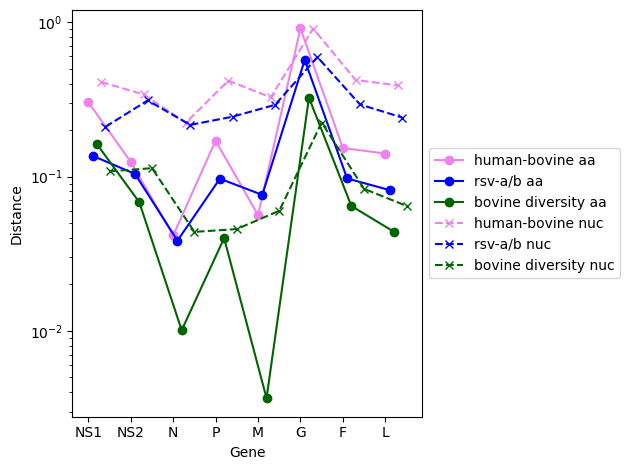

In [5]:
from Bio import Phylo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

listofgenes = ['NS1', 'NS2', 'N','P', 'M', 'G', 'F', 'L' ]
files_aa = [f'/home/laura/code/orthopneumovirus_comparison/results/alignedfiles/{gene}_alignedaa.fasta.treefile' for gene in listofgenes]
files_nuc = [f'/home/laura/code/orthopneumovirus_comparison/results/alignedfiles/{gene}_alignednuc.fasta.treefile' for gene in listofgenes]
#files_aa = [f'/home/laura/bovine_rsv_cleaned_up/alignedfiles/{gene}_alignedaa.fasta.treefile' for gene in listofgenes]
#files_nuc = [f'/home/laura/bovine_rsv_cleaned_up/alignedfiles/{gene}_alignednuc.fasta.treefile' for gene in listofgenes]
#
dictionary_aa, dictionaryhrsv_aa, dictionarybrsv_aa, dictionarybrsv_nuc, dictionary_nuc, dictionaryhrsv_nuc  = (dict() for i in range(6))
distances_aa, distances_hrsv_aa, distances_brsv_aa, distances_nuc, distances_hrsv_nuc, distances_brsv_nuc = ([] for i in range(6))

for file in files_aa:

    T = Phylo.read(file, 'newick')
    T.root.clades
    T.root_at_midpoint()
    T.ladderize
    hrsv_anc = T.common_ancestor('MT107528.1', 'KJ627301.1', 'ON152648.1')
    brsv_anc = T.common_ancestor('MG947594.1', 'MT861050.1', 'OM328114.1', 'AF092942.1')
    distances_aa.append(T.distance(hrsv_anc, brsv_anc))

    rsvA_anc = hrsv_anc.common_ancestor('KJ627301.1', 'ON152648.1')
    rsvB_anc = hrsv_anc.common_ancestor('MT107528.1','MG431251.1')
    distances_hrsv_aa.append(hrsv_anc.distance(rsvA_anc, rsvB_anc))
    distances_brsv_aa.append(brsv_anc.total_branch_length() - brsv_anc.branch_length)

for file in files_nuc:
    T = Phylo.read(file, 'newick')
    T.root.clades
    T.root_at_midpoint()
    T.ladderize
    hrsv_anc = T.common_ancestor('MT107528.1', 'KJ627301.1', 'ON152648.1')
    brsv_anc = T.common_ancestor('MG947594.1', 'MT861050.1', 'OM328114.1', 'AF092942.1')
    distances_nuc.append(T.distance(hrsv_anc, brsv_anc))

    rsvA_anc = hrsv_anc.common_ancestor('KJ627301.1', 'ON152648.1')
    rsvB_anc = hrsv_anc.common_ancestor('MT107528.1','MG431251.1')
    distances_hrsv_nuc.append(hrsv_anc.distance(rsvA_anc, rsvB_anc))
    distances_brsv_nuc.append(brsv_anc.total_branch_length() - brsv_anc.branch_length)

for i, j in zip(listofgenes, distances_aa): dictionary_aa[i] = j
for i, j in zip(listofgenes, distances_hrsv_aa): dictionaryhrsv_aa[i] = j
for i, j in zip(listofgenes, distances_brsv_aa): dictionarybrsv_aa[i] = j
for i, j in zip(listofgenes, distances_nuc): dictionary_nuc[i] = j
for i, j in zip(listofgenes, distances_hrsv_nuc): dictionaryhrsv_nuc[i] = j
for i, j in zip(listofgenes, distances_brsv_nuc): dictionarybrsv_nuc[i] = j

df = pd.DataFrame([dictionary_aa, dictionaryhrsv_aa, dictionarybrsv_aa, dictionary_nuc, dictionaryhrsv_nuc, dictionarybrsv_nuc])
df.to_csv('dataframe.tsv', sep='\t')


tsv_file = open('dataframe.tsv')
read_tsv = pd.read_csv(tsv_file, delimiter='\t').T
a =read_tsv.to_dict()
dictionaries = []

for i, j in a.items():
    del j['Unnamed: 0']
    dictionaries.append(j)

labels = ["human-bovine aa", "rsv-a/b aa", "bovine diversity aa", "human-bovine nuc", "rsv-a/b nuc", "bovine diversity nuc"]
for c, (l, i) in enumerate(zip(labels, dictionaries)):
    if "human-bovine" in l: color_ = "violet"
    if "rsv-a/b" in l: color_ = "blue"
    if "bovine diversity" in l: color_ = "darkgreen"
    if "aa" in l:  
        marker_ = "o"
        linestyle_ = "-"
    if "nuc" in l: 
        marker_ = "x"
        linestyle_ = "--"
    keys = i.keys()
    values = i.values()
    #plt.scatter(np.arange(len(keys))+c*0.1, values, label=l)
    plt.plot(np.arange(len(keys))+c*0.1, values, label=l, linestyle= linestyle_, marker=marker_, color=color_)
    plt.xticks(range(len(keys)), keys)
    plt.xlabel('Gene')
    plt.ylabel('Distance')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.tight_layout()
plt.savefig('distance.pdf', bbox_extra_artists=(lgd,), format='pdf')